In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = load_breast_cancer()

In [6]:
rfc = RandomForestClassifier(n_estimators=100
                            ,random_state=90)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9648809523809524

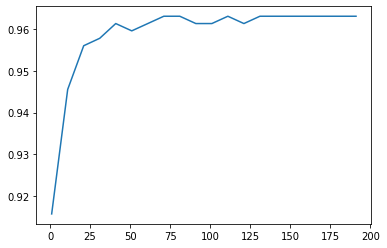

In [8]:
scores = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score)

fig, ax = plt.subplots()
ax.plot([*range(1, 201, 10)], scores)
plt.show()

In [9]:
max(scores), scores.index(max(scores)) * 10 + 1

(0.9631265664160402, 71)

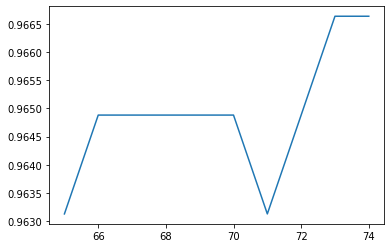

In [10]:
scores = []
for i in range(65, 75):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score)

fig, ax = plt.subplots()
ax.plot([*range(65, 75)], scores)
plt.show()

In [11]:
max(scores), [*range(65, 75)][scores.index(max(scores))]

(0.9666353383458647, 73)

In [14]:
param_grid = {'max_depth': np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=73
                            ,random_state=90)
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [15]:
gs.best_params_

{'max_depth': 8}

In [16]:
gs.best_score_

0.9666353383458647

In [18]:
param_grid = {'max_features': np.arange(5, 30, 1)}
rfc = RandomForestClassifier(n_estimators=73,
                            random_state=90)
gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)
gs.best_params_
gs.best_score_

0.9666666666666668

In [19]:
gs.best_params_

{'max_features': 24}

In [20]:
gs.best_score_

0.9666666666666668